In [1]:
# Probability Exercises

In [2]:
# For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [4]:
# Zack requested that I use both the experimental and statistical approach to all questions.

-- For this set of exercises, my goal is to do a really good job of breaking down the problems.
- For example, start by translating the problem into plain English.
- Then make an attempt to figure out which function I will be using up front. That'll help me figure out my plan of building the code.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, binom

In [2]:
# Importing the viz.py file so I can bring up the visualizations

import viz

In [7]:
stats.poisson(5).pmf(3)

0.1403738958142805

<BarContainer object of 31 artists>

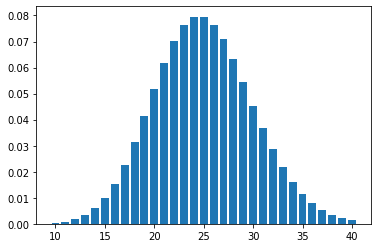

In [12]:
plt.figsize = (13, 12)

x = np.arange(10, 41)
y = stats.poisson(25).pmf(x)

plt.bar(x, y)

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

In [49]:
average_cars = 2

In [69]:
# Probability that 0 cars drive up in the noon hour.
# I'm looking through a discrete number of cars, 0, so pmf is the stat I'm looking to use.

stats.poisson(average_cars).pmf(0)

0.1353352832366127

In [72]:
# Since 0 is the lowest number, and we can't have negative probabilities, then cdf would also work:

noon = stats.poisson(average_cars).cdf(0)
noon

# This worked because cdf looks at variables less than or equal to the given point. Since 0 is the absolute bottom, it actually worked.

0.1353352832366127

In [73]:
# Now solving it using a simulation. Do the probabilities come close?
# stats.random.poisson(2).<something> 

noon_sim = np.random.poisson(2, size = 10000)

# And now use the trusty boolean mask.

(noon_sim == 0).mean()

# Yes, the results are pretty close!

0.1399

In [75]:
# What is the probability that 3 or more cars come through the drive through?

greater_than_three = stats.poisson(average_cars).sf(3)
greater_than_three

0.14287653950145296

In [ ]:
# Solving this problem using simulations:
three_sim = 

In [78]:
# How likely is it that the drive through gets at least 1 car?

one_car = stats.poisson(average_cars).sf(0)
one_car

0.8646647167633873

In [ ]:
# Solving this problem using simulations:



In [52]:
# Textbook examples:

stats.poisson(5).pmf(3)

0.1403738958142805

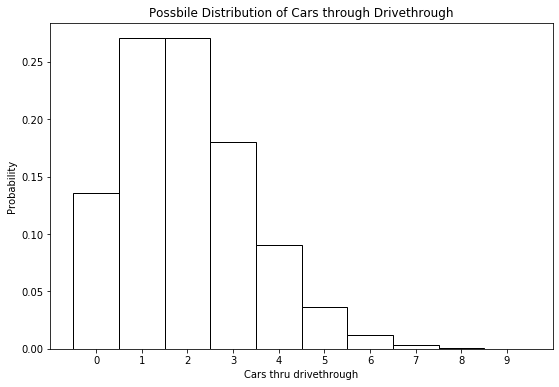

In [66]:
x = range(10) # This can be any random number, just adjust it to fit my distribution.
y = stats.poisson(2).pmf(x)
plt.figure(figsize=(9, 6))
plt.bar(x, y, edgecolor='black', color='white', width=1)
plt.title("Possbile Distribution of Cars through Drivethrough")
plt.xticks(x)
plt.ylabel('Probability')
plt.xlabel('Cars thru drivethrough')
# plt.bar(3, stats.poisson(5).pmf(3), width=1, color='darkseagreen', edgecolor='black')
# plt.annotate(f'P(X = 3) = {stats.poisson(5).pmf(3):.3f}', (3, stats.poisson(5).pmf(3)),
#                 xytext=(7, .16), arrowprops={'arrowstyle': '->'})
plt.show()

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

In [3]:
# I was given the std.dev and the mean, so that means I'll be looking at the normal distribution functions, or binomial I think.

In [12]:
# What grade point average is required to be in the top 5% of the graduating class?

mean_grade = 3.0
stdev_grade = .3

In [18]:
top_five = stats.norm(mean_grade, stdev_grade)

round(top_five.ppf(.95), 2)

3.49

In [ ]:
# Solving this problem using simulations:




In [19]:
# Drawing examples from the viz file to better understand the scipy stats functions...


μ = 12000
σ = 2000

sales = stats.norm(μ, σ)

top_10_percent_cutoff = sales.ppf(.9)

print('${:,.2f}'.format(top_10_percent_cutoff))

$14,563.10


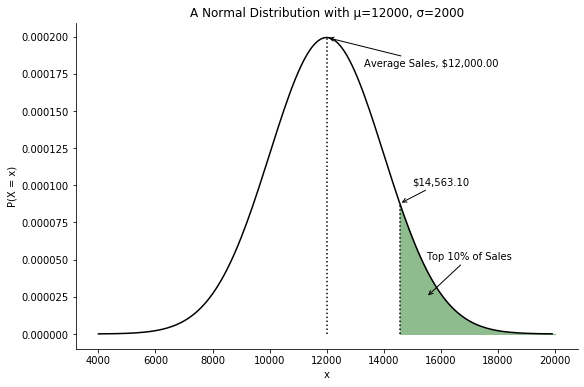

In [8]:
viz.distributions_example7(μ, σ)

In [21]:
# What GPA constitutes the bottom 15% of the class?

bottom_fifteen = stats.norm(mean_grade, stdev_grade).ppf(.15)
round(bottom_fifteen, 2)

2.69

In [22]:
# Solving this problem using simulations:



In [ ]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. 
# Would a student with a 2.8 grade point average qualify for this scholarship?

In [26]:
decilethirty = stats.norm(mean_grade, stdev_grade).ppf(.20)
round(decilethirty, 2)

2.75

In [27]:
decileforty = stats.norm(mean_grade, stdev_grade).ppf(.30)
round(decileforty, 2)

2.84

In [30]:
# The top end of the range would be a GPA of 2.84, so a GPA of 2.85 would not qualify for the scholarship

In [34]:
# If I have a GPA of 3.5, what percentile am I in?

top_five = stats.norm(mean_grade, stdev_grade)

rounded_95 = round(top_five.ppf(.95), 2)

# You are in the 95% percentile of the class.

print(f'If your GPA is higher than {rounded_95}, then you are in or above the 95th percentile of the class.')

If your GPA is higher than 3.49, then you are in or above the 95th percentile of the class.


### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [57]:
clicks = stats.binom(4326, .02).sf(96)
clicks

0.1397582363130086

In [58]:
random_array = stats.binom(4326, .02).rvs(100_000)

In [59]:
(96 < random_array).mean()

0.13968

0.0198013266932447

In [45]:
# Solving this problem using simulations:

np.random.poisson(.02, size = (10_000, 2))

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])